In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  在做预报检验时，数据提取和检验计算的通常是交织在一起的，在本程序中的nmc_vf_method模块中也是如此，在nmc_vf_method中至少计算检验中间量是和数据提取是交织在一起的。有时，我们面对一批预报和观测数据要开展检验工作时，事先并不知道后期要计算什么检验指标，这时需要反复尝试。由于数据提取和检验技术的代码交织在一起，意味着每次增删或更改检验指标时，数据提取的部分也需要重新运行一遍。另外上述问题也意味着想把数据提取部分的代码做进一步的封装难以实现或没有意义。  
  本程序库则为上述问题提供了解决方案，基于nvb_vf_base和nvb_vf_product中的函数，可以将检验过程分割以下三个部分：   
    1.数据收集(文件读取，[拼接合并](https://www.showdoc.cc/nmc?page_id=3777135637659548)）  
    2.[数据选取](https://www.showdoc.cc/nmc?page_id=3777179081910063)  
    3.检验计算   
 这为检验程序的进一步模块化提供了基础。以下结合具体的例子进行说明  

[本模块测试数据集简介和更详细的数据收集代码说明](https://www.showdoc.cc/nmc?page_id=3831227192066999) 

In [2]:
###################以下开始为数据收集部分的程序
dir_ob = r"H:\test_data\input\nvp\ob\temp_2m\BTYYMMDDHH.000"
dir_ec = r"H:\test_data\input\nvp\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
dir_grapes = r"H:\test_data\input\nvp\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
time0 = datetime.datetime(2019,1,1,2,0)   
path = nvb.get_path(dir_ob,time0)
station = nvb.read_stadata_from_micaps3(path)
station.iloc[:,-1] = nvb.IV         
ob_sta_all = None

##读取收集观测数据

time_end = datetime.datetime(2020,1,1,2,0)
while time0 < time_end:
    path = nvb.get_path(dir_ob,time0)
    sta = nvb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    ob_sta_all = nvb.combine_join(ob_sta_all,sta)
    time0 += datetime.timedelta(hours = 3)
    
##读取收集预报数据
ec_sta_all = None
grapes_sta_all = None
time0 =  datetime.datetime(2019,1,1,8,0)
time_end = datetime.datetime(2020,1,1,8,0)
while time0 < time_end:
    for dh in range(0,73,3):
        #读取ec预报数据
        path = nvb.get_path(dir_ec,time0,dh)
        grd = nvb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = nvb.interp_gs_linear(grd,station)
            nvb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            nvb.set_stadata_names(sta,["ecmwf"])
            ec_sta_all = nvb.combine_join(ec_sta_all,sta)
        
        #读取grapes预报数据
        path = nvb.get_path(dir_grapes,time0,dh)
        grd = nvb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = nvb.interp_gs_linear(grd,station)
            nvb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            nvb.set_stadata_names(sta,["grapes"])
            grapes_sta_all = nvb.combine_join(grapes_sta_all,sta)  
    time0 += datetime.timedelta(hours = 132)

#数据匹配合并
sta_all = nvb.combine_on_obTime(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = nvb.not_IV(sta_all)  #删除包含缺省值的样本
###################以上开始为数据收集部分的程序

H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.018 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.018 is not exist
H:\tes

H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.003 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.006 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.009 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.012 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.015 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.018 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.021 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.024 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.027 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.030 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.033 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.036 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.039 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT1902

# 表格型检验产品生成   
**table(sta_ob_and_fos,method,group_by = None,group_list_list = None,save_dir = None,para_list1 = None)**  
根据输入的站点数据和检验方法，生成表格型检验产品，并自动生成后缀名为.xlsx的文件批量输出到指定目录  
  
**参数说明：**  
 **sta_ob_and_fos**:实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all      
 **method**: nmc_vf_method中的各类表格型的函数名称，例如在本页面中已经目前包括nvm.contingency_table_yesorno,   nvm.contingency_table_multicategory 和 nvm.frequency_table等函数           
 **group_by**: 对预报观测样本进行分组检验时的分组依据，缺省是为None，即不进行分组检验，非缺省时为字符串形式，可选项包括   
    "level" ，      按层次进行分组    
    "time"，       按起报时间分组   
    "year"，       按起报时间中的年份进行分组  
    "month",       按起报时间中的月份进行分组  
    "day",         按起报时间中的日期进行分组  
    "dayofyear",     按起报时间中的日期在一年中的排序（day_of_year）进行分组  
    "hour"，       按起报时间的小时数（hour_of_day）进行分组  
    "ob_time"，     按观测时间（起报时间+预报时效）进行分组  
    "ob_year"，     按观测时间（起报时间+预报时效）中的年份进行分组  
    "ob_month"，     按观测时间（起报时间+预报时效）中的月份进行分组  
    "ob_day"，      按观测时间（起报时间+预报时效）中的日期进行分组
    "ob_dayofyear"，  按观测时间（起报时间+预报时效）中的日期在一年中的排序（day_of_year）进行分组   
    "ob_hour"，      按观测时间（起报时间+预报时效）中的小时数（hour_of_day）进行分组     
    "dtime",        按预报时效进行分组  
    "dday"，        按预报时效包含的天数进行分组，例如预报时效为0、12、24和36小时的样本会分别被标记为 0、1、1和2  
    "dhour",        按预报时效整除24小时后的余数进行分组，例如预报时效为12、24和36小时的样本会分别被标记为 12，0和12  
    "id",          按站号进行分组  
 **group_list_list**: 指定分组方式，例如当group_by ="month"时，如果group_list_list = None，则每个月的样本都被分作一组，如果希望按季度分组，则可设置 group_list_list = [[2,3,4],[5,6,7],[8,9,10],[11,12,1]]   
 **save_dir**: 生成的表格文件的保存目录    
 **para1** : 检验方法 method 中ob,fo和save_path三个基本参数之外的第1个参数， 例如在nvm.contingency_table_yesorno(ob,fo,grade_list,save_path)中 para1等价于的grade_list   
 **return**: 返回一个元组，其包含2个元素，分别是包含数值检验指标的numpy数组和group_list_list,如果group_by不为None。检验指标数组的shape = （分组数目 ， 预报（模式）数目 ， 参数列表长度，2维表格的shape） 的数组经删除size= 1的维度后的结果。
 
  
**调用示例：**

In [44]:
sta = nvb.by_loc_dict(sta_all,{"month":[12],"id":[54398]}) #从总样本中截取54398站点起报时间为每日20时的样本
result,group = nvp.table(sta,nvm.contingency_table_yesorno) 
print(result)  #  shape  = 2 （模式数） * 3 * 3
print(group)   # 没有分组

[[[ 84  22 106]
  [  5  27  32]
  [ 89  49 138]]

 [[ 86  26 112]
  [  3  23  26]
  [ 89  49 138]]]
None


In [45]:
result,group = nvp.table(sta,nvm.contingency_table_yesorno,group_by = "hour",
                         save_dir = r"H:\test_data\output\nvp\base\table",para1 = [0,10]) 
print(result)  #  shape  = 2(分类数) * 2 （模式数） * 2（等级数）* 3 * 3
print(group)   #  按hour分组，结果包括[8] 和[20]

列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_yesorno_ecmwf_hour[8].xlsx
列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_yesorno_grapes_hour[8].xlsx
列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_yesorno_ecmwf_hour[20].xlsx
列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_yesorno_grapes_hour[20].xlsx
[[[[[49.  4. 53.]
    [ 4.  7. 11.]
    [53. 11. 64.]]

   [[64.  0. 64.]
    [ 0.  0.  0.]
    [64.  0. 64.]]]


  [[[50.  2. 52.]
    [ 3.  9. 12.]
    [53. 11. 64.]]

   [[64.  0. 64.]
    [ 0.  0.  0.]
    [64.  0. 64.]]]]



 [[[[33. 20. 53.]
    [ 1. 20. 21.]
    [34. 40. 74.]]

   [[74.  0. 74.]
    [ 0.  0.  0.]
    [74.  0. 74.]]]


  [[[34. 26. 60.]
    [ 0. 14. 14.]
    [34. 40. 74.]]

   [[74.  0. 74.]
    [ 0.  0.  0.]
    [74.  0. 74.]]]]]
[[8], [20]]


输出的excel文件截图如下：
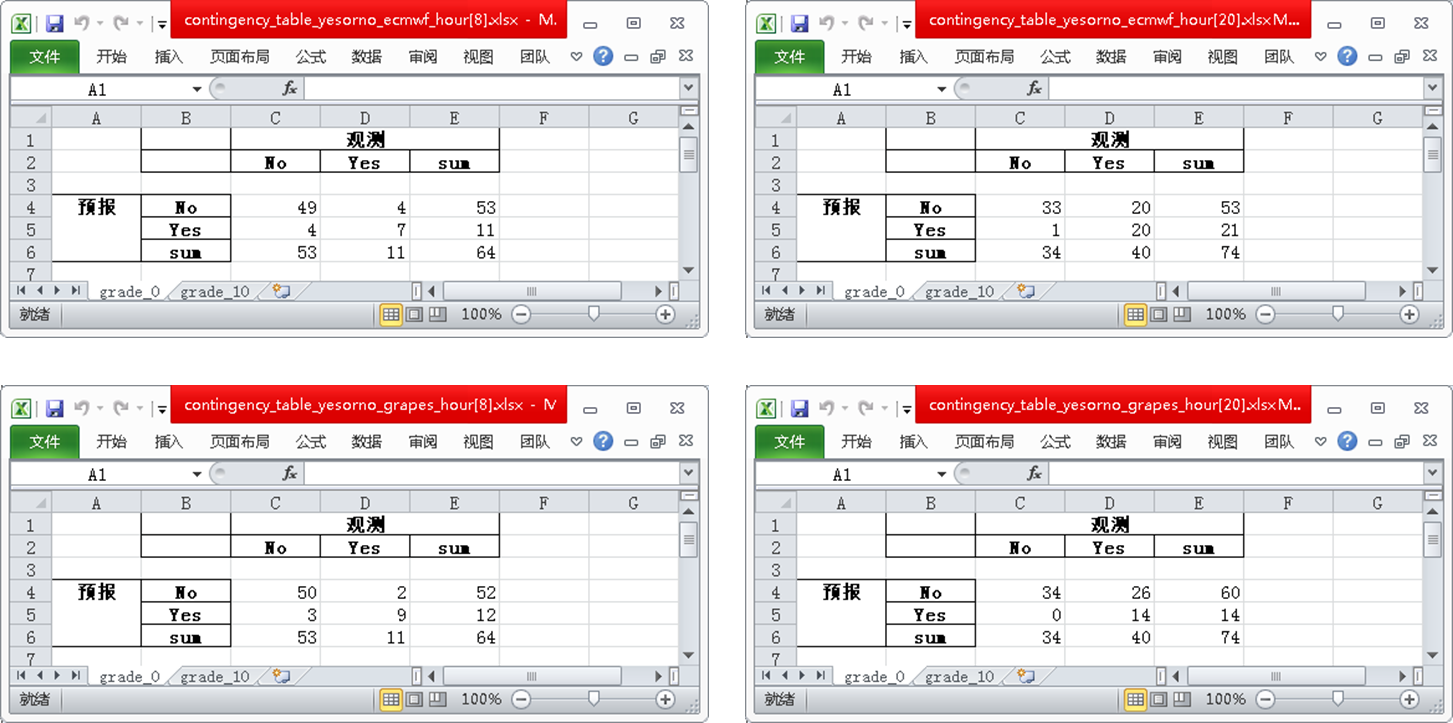

In [46]:
result,group = nvp.table(sta,nvm.contingency_table_multicategory,
                          save_dir = r"H:\test_data\output\nvp\base\table", para1 = [0,5]) 
print(result)  #  shape  = 2 （模式数） * 4（2+等级数）* 4(2+等级数)
print(group)   #  未分组

列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_multicategory_ecmwf.xlsx
列联表已以excel表格形式保存至H:/test_data/output/nvp/base/table/contingency_table_multicategory_grapes.xlsx
[[[ 82.  24.   0. 106.]
  [  5.  14.   8.  27.]
  [  0.   1.   4.   5.]
  [ 87.  39.  12. 138.]]

 [[ 84.  26.   2. 112.]
  [  3.  12.   6.  21.]
  [  0.   1.   4.   5.]
  [ 87.  39.  12. 138.]]]
None


输出的excel截图如下：
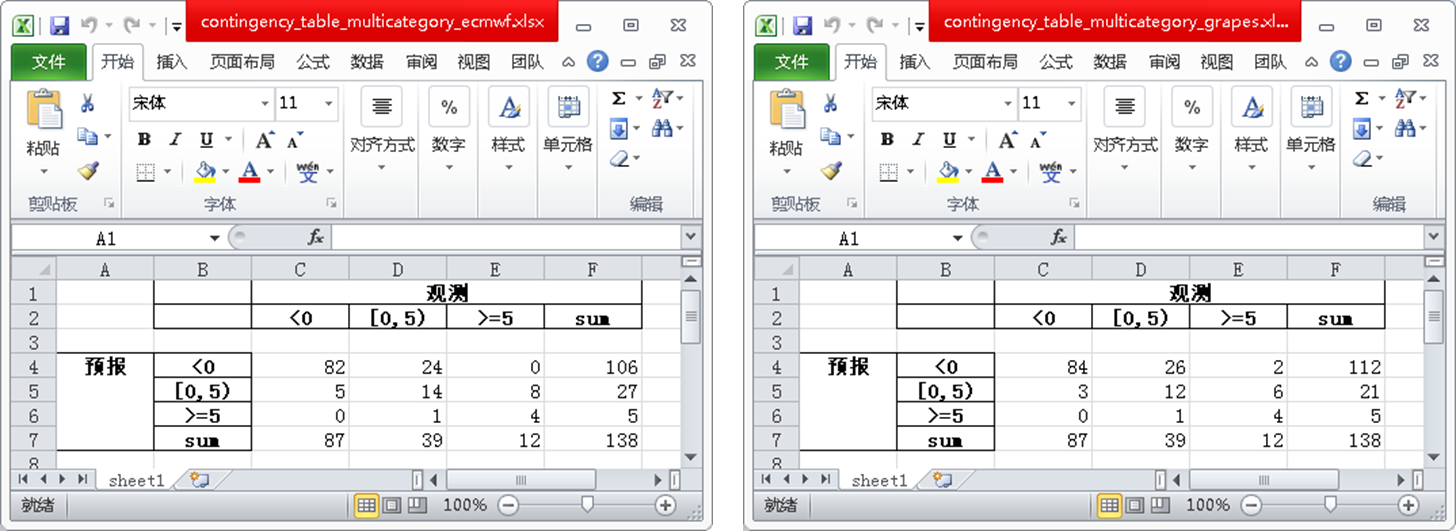

In [43]:
result,group = nvp.table(sta,nvm.frequency_table, 
                          save_dir = r"H:\test_data\output\nvp\base\table",para1 = [0,1,2,3,4,5]) 
print(result)  #  shape  = 2 （模式数） * 2  * 7(1+等级数)
print(group)   #  未分组

频率统计结果已以excel表格形式保存至H:/test_data/output/nvp/base/table/frequency_table_ecmwf.xlsx
频率统计结果已以excel表格形式保存至H:/test_data/output/nvp/base/table/frequency_table_grapes.xlsx
[[[ 87.   9.  16.   6.   7.   1.  12.]
  [106.  10.   6.   3.   5.   3.   5.]]

 [[ 87.   9.  16.   6.   7.   1.  12.]
  [112.   9.   2.   7.   1.   2.   5.]]]
None


输出excel的截图如下：
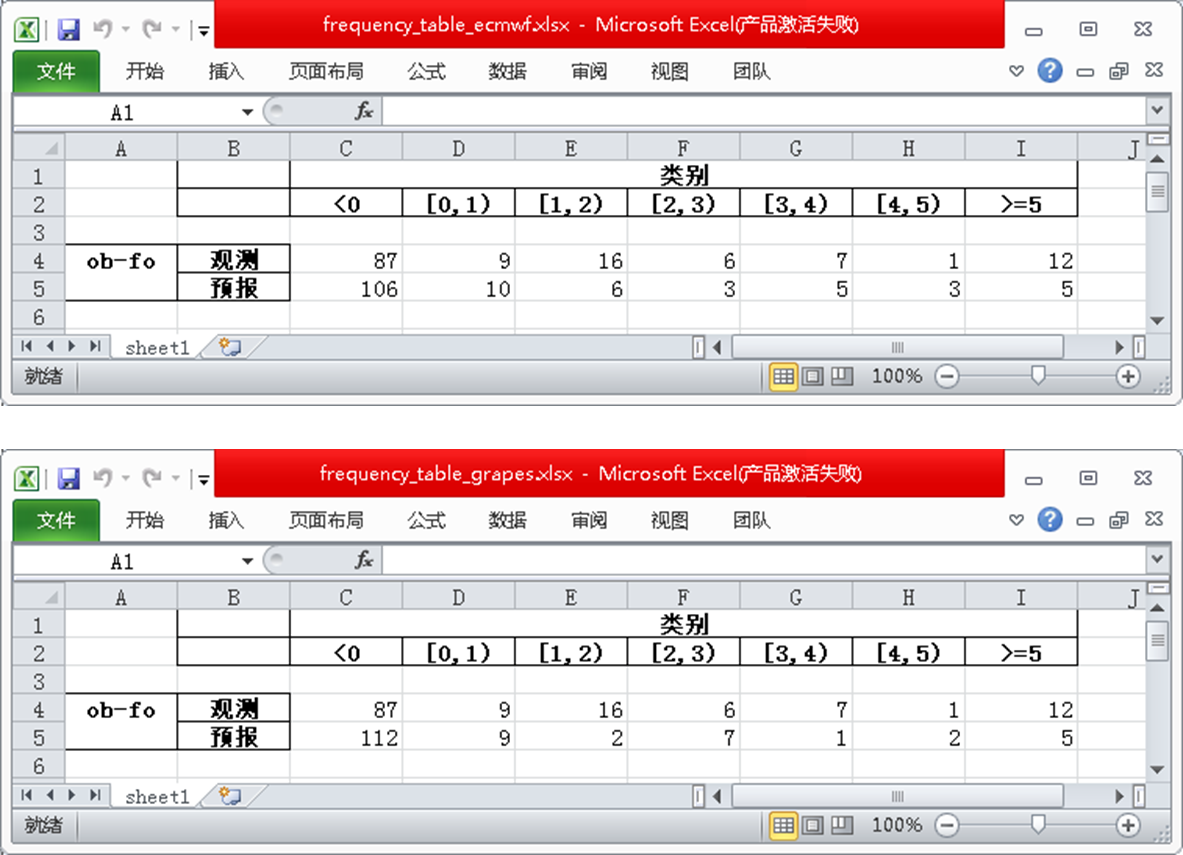

从上面的示例中可以看出，基于本程序库提供的函数，实现了数据收集、数据提取和检验计算代码的解耦，使得我们检验分析的过程变得十分灵活，同时解耦也为各部分的进一步模块化提供了基础。值得注意的是采用上述方法进行检验时，会出现如下几个方面的问题：  
    1，将数据全部收集到sta_all变量当中,需要内存足够大  
    2，当sta_all太大时，从中做数据选取，速度会变慢   
    3，不能计算和存储检验中间检验量，也因此不能开展并行计算  
    4，目前只能支持按一个纬度进行简单的分组，不能按多个维度同时分组，例如将样本同时按月份和时效进行分组的功能无法提供。 
上述问题可以在更上一层（nmc_vf_report）中提供解决方案  